In [1]:
import numpy as np
from numpy.linalg import matrix_rank
import random
import scipy
from scipy import sparse
from scipy import stats
import matplotlib.pyplot as plt
import time
import pandas as pd
import ast

In [ ]:
class Node:
    def __init__(self):
        self.rank = None
        self.size = None
        self.singular_values = None
        self.U = None
        self.V = None
        self.sons = None

In [2]:
def show_array(repr, name, zeros=False):
    if zeros:
        plt.spy((repr != 0).astype(int))
    else:
        plt.spy(repr)
    plt.grid(False)
    plt.title(name)
    plt.show()

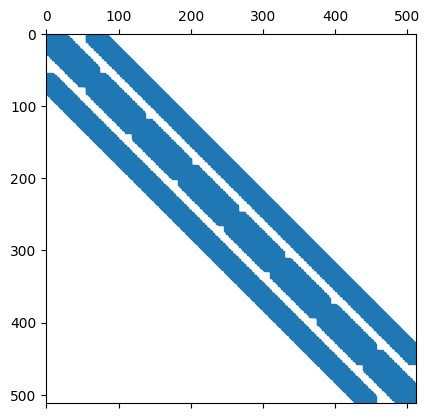

In [3]:
from scipy.sparse import csr_matrix

def generate_sparse_matrix(k):
    size = 2**(3*k)
    rows = []
    cols = []

    def within_bounds(x, y, z):
        return 0 <= x < 2**k and 0 <= y < 2**k and 0 <= z < 2**k

    for i in range(size):
        x = i % (2**k)
        y = (i // (2**k)) % (2**k)
        z = i // (2**k * 2**k)

        neighbors = [
            (x, y, z+1),  # góra
            (x, y, z-1),  # dół
            (x-1, y, z),  # lewo
            (x+1, y, z),  # prawo
            (x, y-1, z),  # przód
            (x, y+1, z)   # tył
        ]

        for (nx, ny, nz) in neighbors:
            if within_bounds(nx, ny, nz):
                neighbor_index = nx + ny * 2**k + nz * 2**k * 2**k
                rows.append(i)
                cols.append(neighbor_index)

    adjacency_matrix = csr_matrix((np.ones(len(rows)), (rows, cols)), shape=(size, size))
    return adjacency_matrix



m = generate_sparse_matrix(3)
show_array(m, "")